In [28]:
import pandas as pd
import matplotlib.pyplot as plt

paquetes = pd.read_csv('paquetesFacu.csv')
paquetes.head()

,src,kind,dst,type,timeStamp,timeAfterBegginSniffing,entropia
0,2e:54:75:b4:8d:90,UNICAST,3c:06:30:51:ba:08,2048,1.694649e+09,0.017509,0.0
1,2e:54:75:b4:8d:90,UNICAST,3c:06:30:51:ba:08,2048,1.694649e+09,0.018423,0.0
2,2e:54:75:b4:8d:90,UNICAST,3c:06:30:51:ba:08,2048,1.694649e+09,0.021287,0.0
3,3c:06:30:51:ba:08,UNICAST,2e:54:75:b4:8d:90,2048,1.694649e+09,0.022050,0.0
4,2e:54:75:b4:8d:90,UNICAST,3c:06:30:51:ba:08,2048,1.694649e+09,0.022763,0.0


In [29]:
paquetes_por_src = paquetes.groupby('src').size()
paquetes_por_src.head()

src
2e:54:75:b4:8d:90    5280
36:e8:f0:f9:36:f0       3
3c:06:30:51:ba:08    4624
62:ac:e1:49:f3:a1       8
7e:7d:04:e1:a2:47       3
dtype: int64

In [30]:
paquetes_por_dst = paquetes.groupby('dst').size()
paquetes_por_dst.head()

dst
01:00:5e:00:00:fb      87
01:00:5e:7f:ff:fa      70
2e:54:75:b4:8d:90    4474
33:33:00:00:00:fb      41
3c:06:30:51:ba:08    5280
dtype: int64

In [31]:
paquetes_por_kind = paquetes.groupby('kind').size()
paquetes_por_kind.head()

kind
BROADCAST      48
UNICAST      9952
dtype: int64

<Axes: xlabel='timeAfterBegginSniffing'>

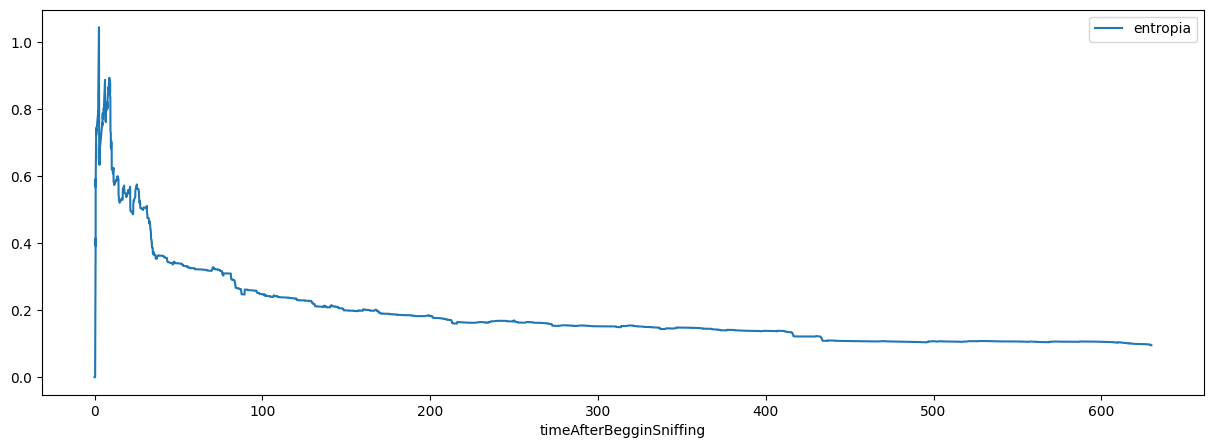

In [32]:
#Grafico la entropia de los paquetes a lo largo del tiempo
paquetes.plot(x='timeAfterBegginSniffing', y='entropia', figsize=(15,5))